In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.plotly as py
import scipy
import xgboost as xgb

In [2]:
#Importing the Data 
train =  pd.read_csv("D:\\Kaggle Projects\\Loan\\train.csv")
test =  pd.read_csv("D:\\Kaggle Projects\\Loan\\test.csv")

In [3]:
#Exploring the Data 
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.describe()

C:\Users\dubey\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%             NaN
50%             NaN
75%             NaN
max      700.000000
Name: LoanAmount, dtype: float64

In [6]:
train['LoanAmount'].isnull().values.sum()

22

In [7]:
train['LoanAmount'].count()

592

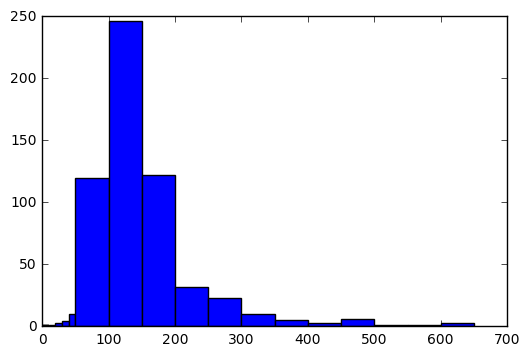

In [8]:
plt.hist(train['LoanAmount'].dropna() , bins=[0, 10, 20, 30, 40, 50, 100,150 , 200, 250 , 300, 350,400,450,500,550,600,650])
plt.show()

In [9]:
train['LoanAmount'].median()

128.0

In [10]:
train['LoanAmount'].fillna(128, inplace=True)

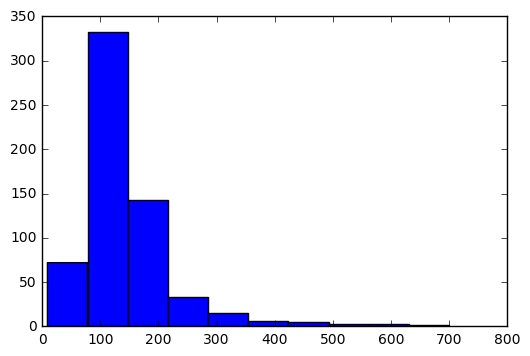

In [11]:
plt.hist(train['LoanAmount'])
plt.show()

In [12]:
a = train['LoanAmount']
b = train['ApplicantIncome']
plt.scatter(a,b)

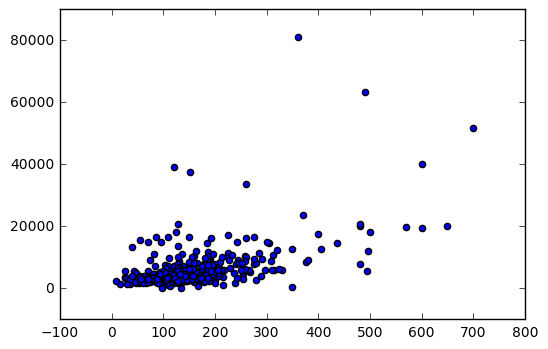

In [13]:
plt.show()

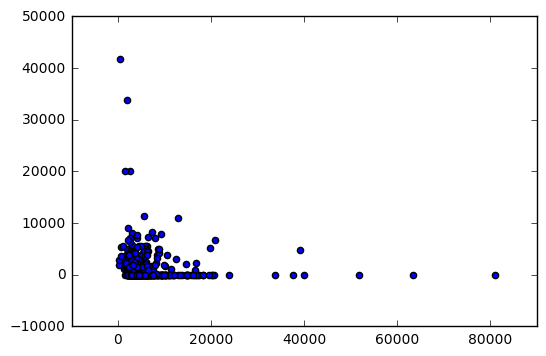

In [14]:
a = train['ApplicantIncome']
b = train['CoapplicantIncome']
plt.scatter(a,b)
plt.show()

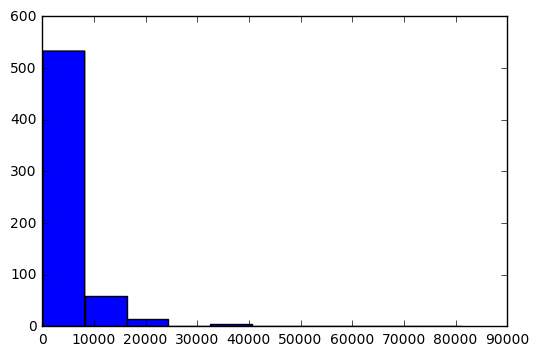

In [15]:
plt.hist(train['ApplicantIncome'] )
plt.show()

In [16]:
train[train['ApplicantIncome' ] >30000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


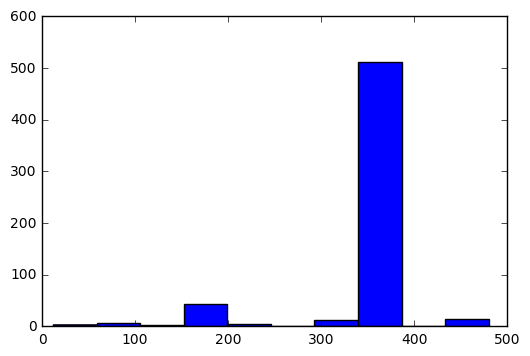

In [17]:
plt.hist(train['Loan_Amount_Term'].dropna())
plt.show()

In [18]:

train['Loan_Amount_Term'].median()

360.0

In [19]:
train['Loan_Amount_Term'].mean()

342.0

In [20]:
train['Loan_Amount_Term'].fillna(360, inplace=True)

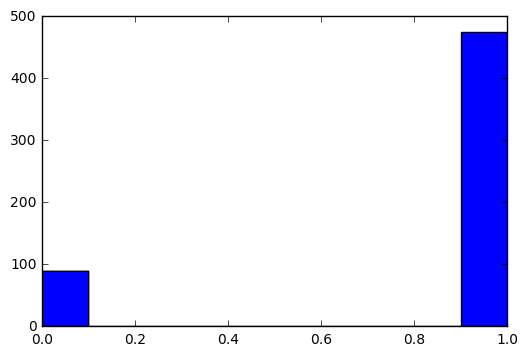

In [21]:
plt.hist(train['Credit_History'].dropna())
plt.show()

In [22]:
train['Credit_History'].fillna(1, inplace=True)

In [23]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [24]:
train['Gender'].isnull().values.sum()
train['Gender'].fillna(1, inplace=True)

In [25]:
train.loc[(train.Gender== 'Male') ,'Gender' ] = 1
train.loc[(train.Gender== 'Female') ,'Gender' ] = 0

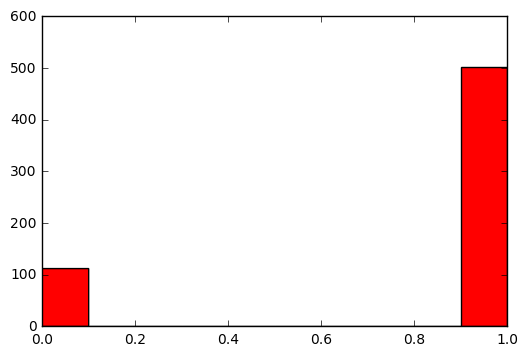

In [26]:
plt.hist(train['Gender'],color='red')
plt.show()

In [27]:
train['Married'].isnull().values.sum()
train['Married'].fillna(0, inplace=True)

In [28]:
train.loc[(train.Married== 'No') ,'Married' ] = 1
train.loc[(train.Married== 'Yes') ,'Married' ] = 0

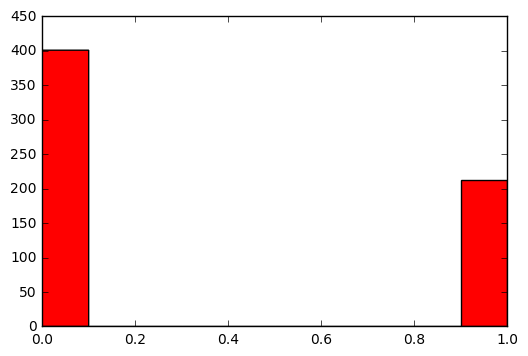

In [29]:
plt.hist(train['Married'],color='red')
plt.show()

In [30]:
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [31]:
train.loc[(train.Education== 'Graduate') ,'Education' ] = 1
train.loc[(train.Education== 'Not Graduate') ,'Education' ] = 0

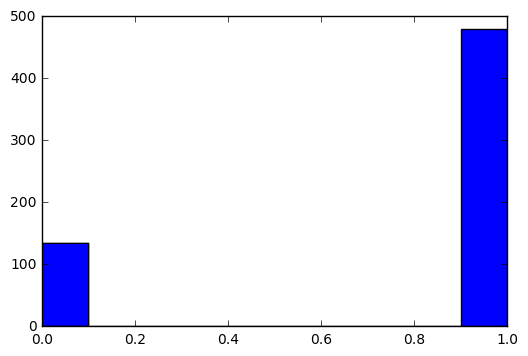

In [32]:
plt.hist(train['Education'])
plt.show()

In [33]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [34]:
train.loc[(train.Loan_Status== 'Y') ,'Loan_Status' ] = 1
train.loc[(train.Loan_Status== 'N') ,'Loan_Status' ] = 0

In [35]:
a = train['LoanAmount']
b = train['Loan_Status']
plt.scatter(b,a)


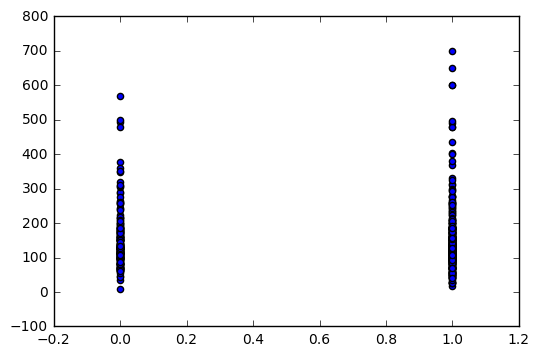

In [36]:
plt.show()

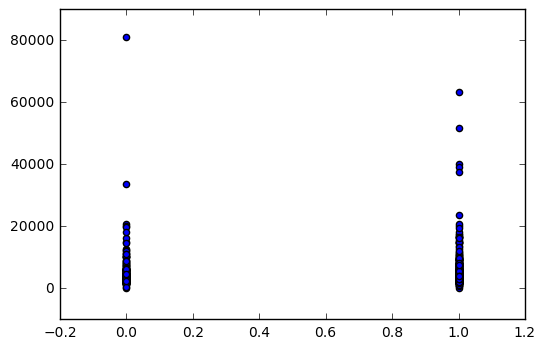

In [37]:
a = train['ApplicantIncome']
b = train['Loan_Status']
plt.scatter(b,a)
plt.show()

In [38]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [39]:
train.loc[(train.Property_Area== 'Urban') ,'Property_Area' ] = 0
train.loc[(train.Property_Area== 'Rural') ,'Property_Area' ] = 1
train.loc[(train.Property_Area== 'Semiurban') ,'Property_Area' ] = 2

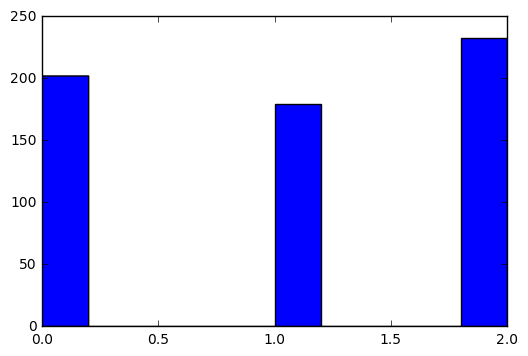

In [40]:
plt.hist(train['Property_Area'])
plt.show()

In [41]:
train['Property_Area'] = train['Property_Area'].apply(int)

In [42]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.050489
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.840875
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 62.4+ KB


In [44]:
train['Self_Employed'].isnull().values.sum()

32

In [45]:
train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [46]:
train.loc[(train.Self_Employed== 'No') ,'Self_Employed' ] = 0
train.loc[(train.Self_Employed== 'Yes') ,'Self_Employed' ] = 1

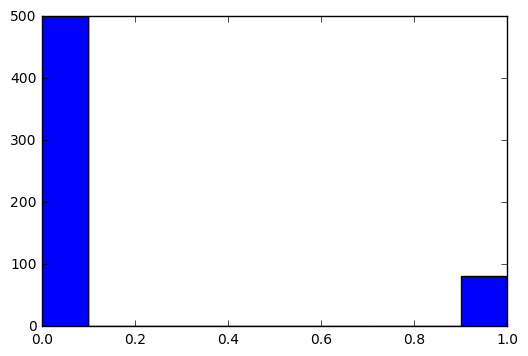

In [47]:
plt.hist(train['Self_Employed'].dropna())
plt.show()

In [48]:
train['Self_Employed'].fillna(0, inplace=True)

In [49]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [50]:
train.loc[(train.Dependents== '3+') ,'Dependents' ] = 3
train['Dependents'].fillna(4, inplace=True)

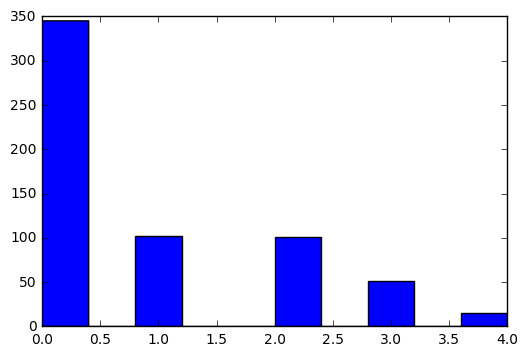

In [51]:
train['Dependents'] = train['Dependents'].apply(int)
plt.hist(train['Dependents'].dropna())
plt.show()

In [52]:
train.loc[(train.Dependents== 4) ,'Dependents' ] = 0

In [53]:
train['Education'] = train['Education'].apply(int)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null object
dtypes: float64(4), int64(5), object(4)
memory usage: 62.4+ KB


In [55]:
######################################################################################
#
#                                   ANALYSIS START
#######################################################################################

In [56]:
train.groupby(['Gender'])['Loan_Status'].sum().plot(kind="bar")

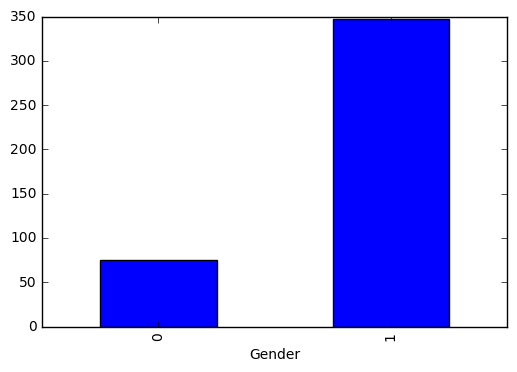

In [57]:
plt.show()

In [58]:
train.groupby(['Loan_Status'])['ApplicantIncome'].sum().plot(kind="Bar")

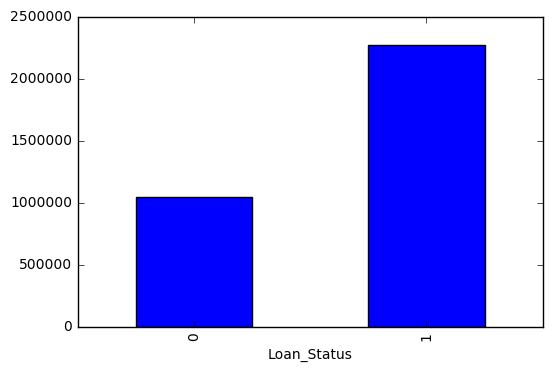

In [59]:
plt.show()

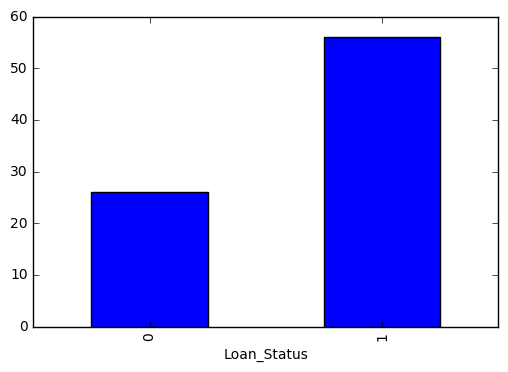

In [60]:
train.groupby(['Loan_Status'])['Self_Employed'].sum().plot(kind="Bar")
plt.show()

In [61]:
train.groupby(['Self_Employed','Loan_Status']).size()

Self_Employed  Loan_Status
0              0              166
               1              366
1              0               26
               1               56
dtype: int64

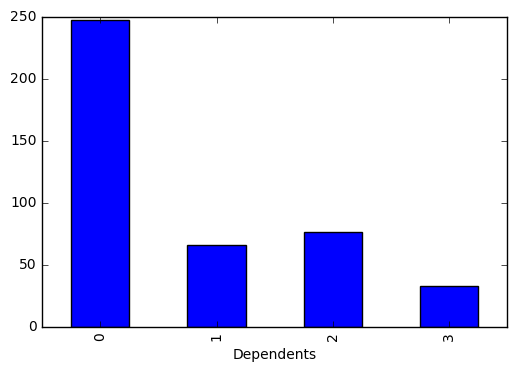

In [62]:
train.groupby(['Dependents'])['Loan_Status'].sum().plot(kind="Bar")
plt.show()

In [63]:
train.groupby(['Dependents','Loan_Status']).size()

Dependents  Loan_Status
0           0              113
            1              247
1           0               36
            1               66
2           0               25
            1               76
3           0               18
            1               33
dtype: int64

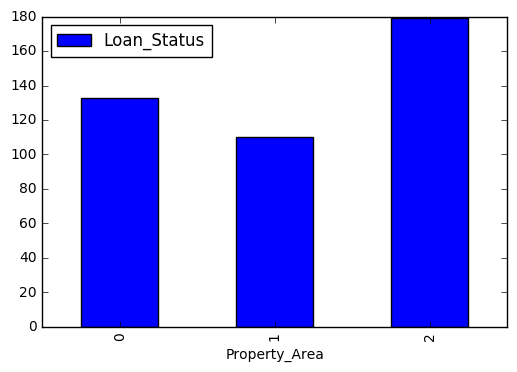

In [64]:
train.groupby(['Property_Area'])[['Loan_Status']].sum().plot(kind="Bar")
plt.show()

In [65]:
train.groupby(['Property_Area','Loan_Status']).size()

Property_Area  Loan_Status
0              0               69
               1              133
1              0               69
               1              110
2              0               54
               1              179
dtype: int64

In [66]:
train.groupby(['Credit_History','ApplicantIncome']).size().plot(kind='line')

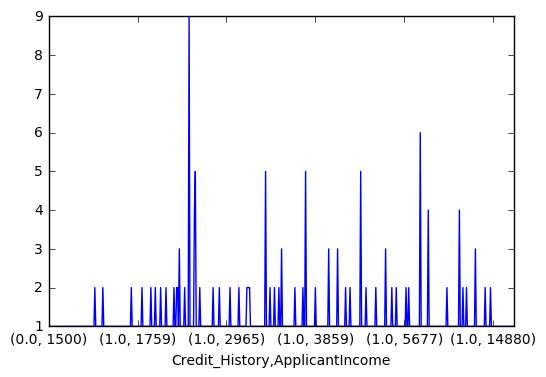

In [67]:
plt.show()

In [68]:
train['Loan_Amount_Term'].unique()

array([ 360.,  120.,  240.,  180.,   60.,  300.,  480.,   36.,   84.,   12.])

In [69]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].apply(int)

In [70]:
plt.scatter(train['ApplicantIncome'],train['Loan_Amount_Term'])

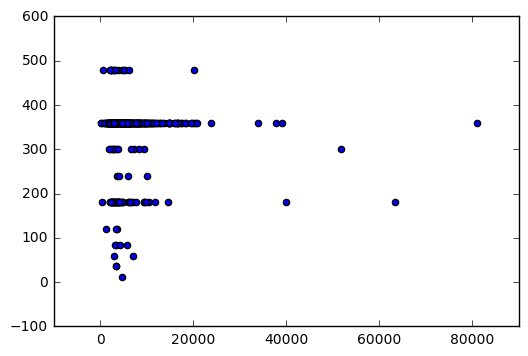

In [71]:
plt.show()

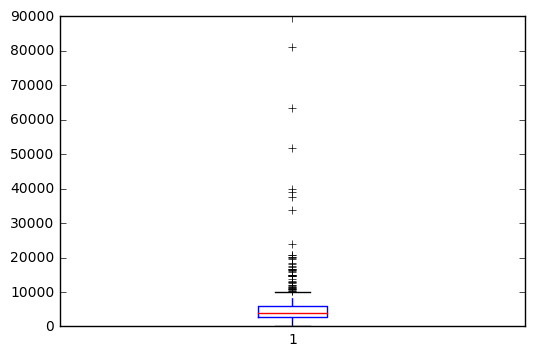

In [72]:
plt.boxplot(train['ApplicantIncome'])
plt.show()

In [73]:
train.groupby(['Property_Area','ApplicantIncome']).size().plot(kind='line')

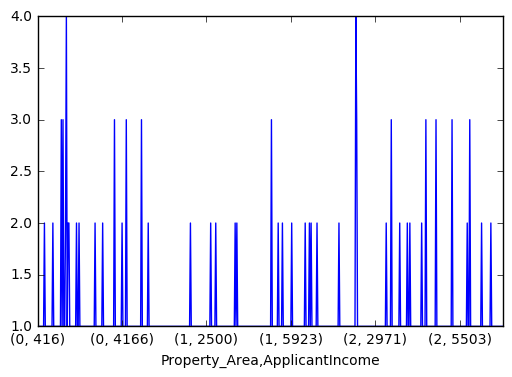

In [74]:
plt.show()

In [75]:
train.to_csv("D:\\Kaggle Projects\\Loan\\trainModified.csv", index=False)